In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("data/train.csv")

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [7]:
df=df.rename(columns={'blue':'bluetooth','fc':'front_cam_mp','sc_h':'screen_ht','sc_w':'screen_wt'})

In [8]:
df=df.rename(columns={'pc':'back_cam_mp'})

In [9]:
df=df.drop(columns=['m_dep','mobile_wt','px_height','px_width'])

In [10]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_mp,four_g,int_memory,n_cores,back_cam_mp,ram,screen_ht,screen_wt,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,2,2,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,3,6,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,5,6,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,6,9,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,2,14,1411,8,2,15,1,1,0,1


In [11]:
df.shape

(2000, 17)

In [12]:
df['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [13]:
df['bluetooth'].unique()

array([0, 1], dtype=int64)

In [14]:
df['clock_speed'].unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [15]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [16]:
df['front_cam_mp'].unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [17]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [18]:
df['int_memory'].describe()

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

In [19]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

In [20]:
df['back_cam_mp'].describe()

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: back_cam_mp, dtype: float64

In [21]:
df['ram'].describe()

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

In [22]:
df['screen_ht'].unique()

array([ 9, 17, 11, 16,  8, 13, 19,  5, 14, 18,  7, 10, 12,  6, 15],
      dtype=int64)

In [23]:
df['screen_wt'].unique()

array([ 7,  3,  2,  8,  1, 10,  9,  0, 15, 13,  5, 11,  4, 12,  6, 17, 14,
       16, 18], dtype=int64)

In [35]:
df['talk_time'].describe()

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

In [24]:
df['three_g'].value_counts()

1    1523
0     477
Name: three_g, dtype: int64

In [25]:
df['touch_screen'].value_counts()

1    1006
0     994
Name: touch_screen, dtype: int64

In [26]:
df['four_g'].value_counts()

1    1043
0     957
Name: four_g, dtype: int64

In [39]:
df['wifi'].value_counts()

1    1014
0     986
Name: wifi, dtype: int64

In [27]:
df['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [28]:
df['clock_speed']=pd.cut(df['clock_speed'],bins=[0,1,2,3],labels=['low','mid','high'])



In [29]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_mp,four_g,int_memory,n_cores,back_cam_mp,ram,screen_ht,screen_wt,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,high,0,1,0,7,2,2,2549,9,7,19,0,0,1,1
1,1021,1,low,1,0,1,53,3,6,2631,17,3,7,1,1,0,2
2,563,1,low,1,2,1,41,5,6,2603,11,2,9,1,1,0,2
3,615,1,high,0,0,0,10,6,9,2769,16,8,11,1,0,0,2
4,1821,1,mid,0,13,1,44,2,14,1411,8,2,15,1,1,0,1


In [30]:
level_map={'low':0,'mid':1,'high':2}
df['clock_speed']=df['clock_speed'].replace(level_map)

In [31]:
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam_mp,four_g,int_memory,n_cores,back_cam_mp,ram,screen_ht,screen_wt,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2,0,1,0,7,2,2,2549,9,7,19,0,0,1,1
1,1021,1,0,1,0,1,53,3,6,2631,17,3,7,1,1,0,2
2,563,1,0,1,2,1,41,5,6,2603,11,2,9,1,1,0,2
3,615,1,2,0,0,0,10,6,9,2769,16,8,11,1,0,0,2
4,1821,1,1,0,13,1,44,2,14,1411,8,2,15,1,1,0,1


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

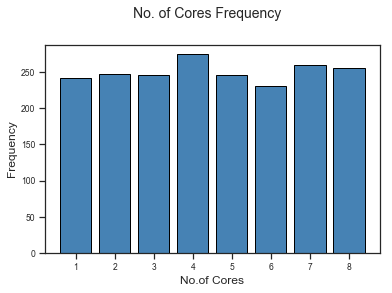

In [57]:
# Bar Plot
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("No. of Cores Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("No.of Cores")
ax.set_ylabel("Frequency") 
w_q = df['n_cores'].value_counts()
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue', 
        edgecolor='black', linewidth=1)

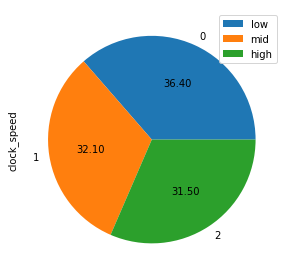

In [48]:
labels=['low','mid','high']
df['clock_speed'].value_counts().plot(kind='pie',autopct='%.2f')
plt.tight_layout()
plt.legend(labels)
plt.show()

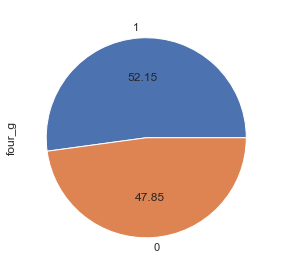

In [92]:

df['four_g'].value_counts().plot(kind='pie',autopct='%.2f')
plt.tight_layout()

plt.show()

In [49]:
sns.set(style="ticks", color_codes=True)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

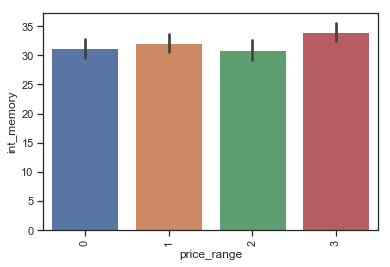

In [90]:
sns.barplot(x=df['price_range'],y=df['int_memory'])
plt.xticks(rotation=90)

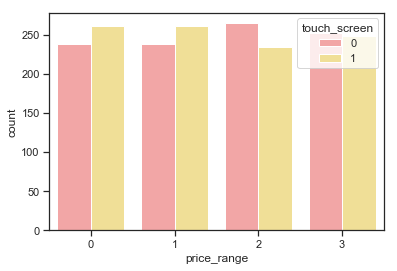

In [71]:

# Multi-bar Plot
cp = sns.countplot(x="price_range", hue="touch_screen", data=df, 
                   palette={0: "#FF9999", 1: "#FFE888"})

Text(0, 0.5, 'internal memory')

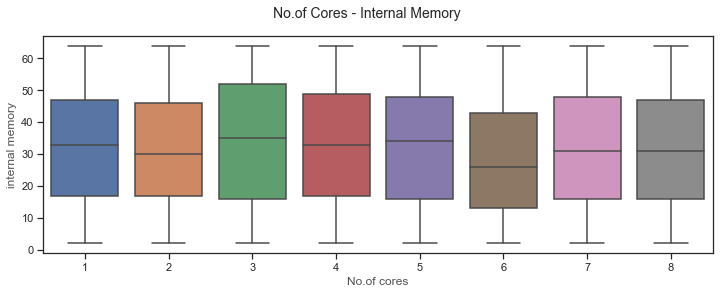

In [81]:
# Box Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 4))
f.suptitle('No.of Cores - Internal Memory', fontsize=14)

sns.boxplot(x="n_cores", y="int_memory", data=df,  ax=ax)
ax.set_xlabel("No.of cores",size = 12,alpha=0.8)
ax.set_ylabel("internal memory",size = 12,alpha=0.8)

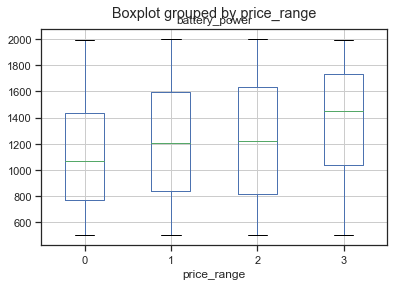

In [93]:
df.boxplot(column='battery_power',by='price_range   ')
plt.show()